# Regression of Used Car Prices

Bu projemizde ikinci el araçların fiyatlarını tahmin eden bir model olusturacağız

<img src="https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fwww.ft.com%2F__origami%2Fservice%2Fimage%2Fv2%2Fimages%2Fraw%2Fhttps%253A%252F%252Fd1e00ek4ebabms.cloudfront.net%252Fproduction%252F9443ae47-6f8d-4d91-9a00-d39fc2a58561.jpg%3Fsource%3Dnext-article%26fit%3Dscale-down%26quality%3Dhighest%26width%3D700%26dpr%3D1?source=next-opengraph&fit=scale-down&width=900" width="1000">

<a href="https://www.kaggle.com/competitions/playground-series-s4e9/overview">Dataya Buradan Erişebilirsiniz</a>

In [6]:
import pandas as pd

pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### EDA

In [7]:
df=pd.read_csv("train.csv")

In [8]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [9]:
df.shape

(188533, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [11]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [12]:
df["model"].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [13]:
df["model"].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [14]:
df["model_year"].nunique()

34

In [15]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [16]:
# "-" ve "not supported" ları aynı olarak değerlendirdim
df['fuel_type'] = df['fuel_type'].replace('–', 'not supported')

In [17]:
df["engine"].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

In [18]:
df["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [19]:
df["ext_col"].value_counts()

ext_col
Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
GT SILVER                                 5
Blue Caelum                               5
Granite Crystal Metallic Clearcoat        5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64

In [20]:
df["int_col"].nunique()

156

In [21]:
df["accident"].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [22]:
# Bos verileri doldurma

In [23]:
df["accident"]=df["accident"].fillna("None reported")

In [24]:
df["fuel_type"]=df["fuel_type"].fillna("Gasoline")

In [25]:
df["price"].max()

2954083

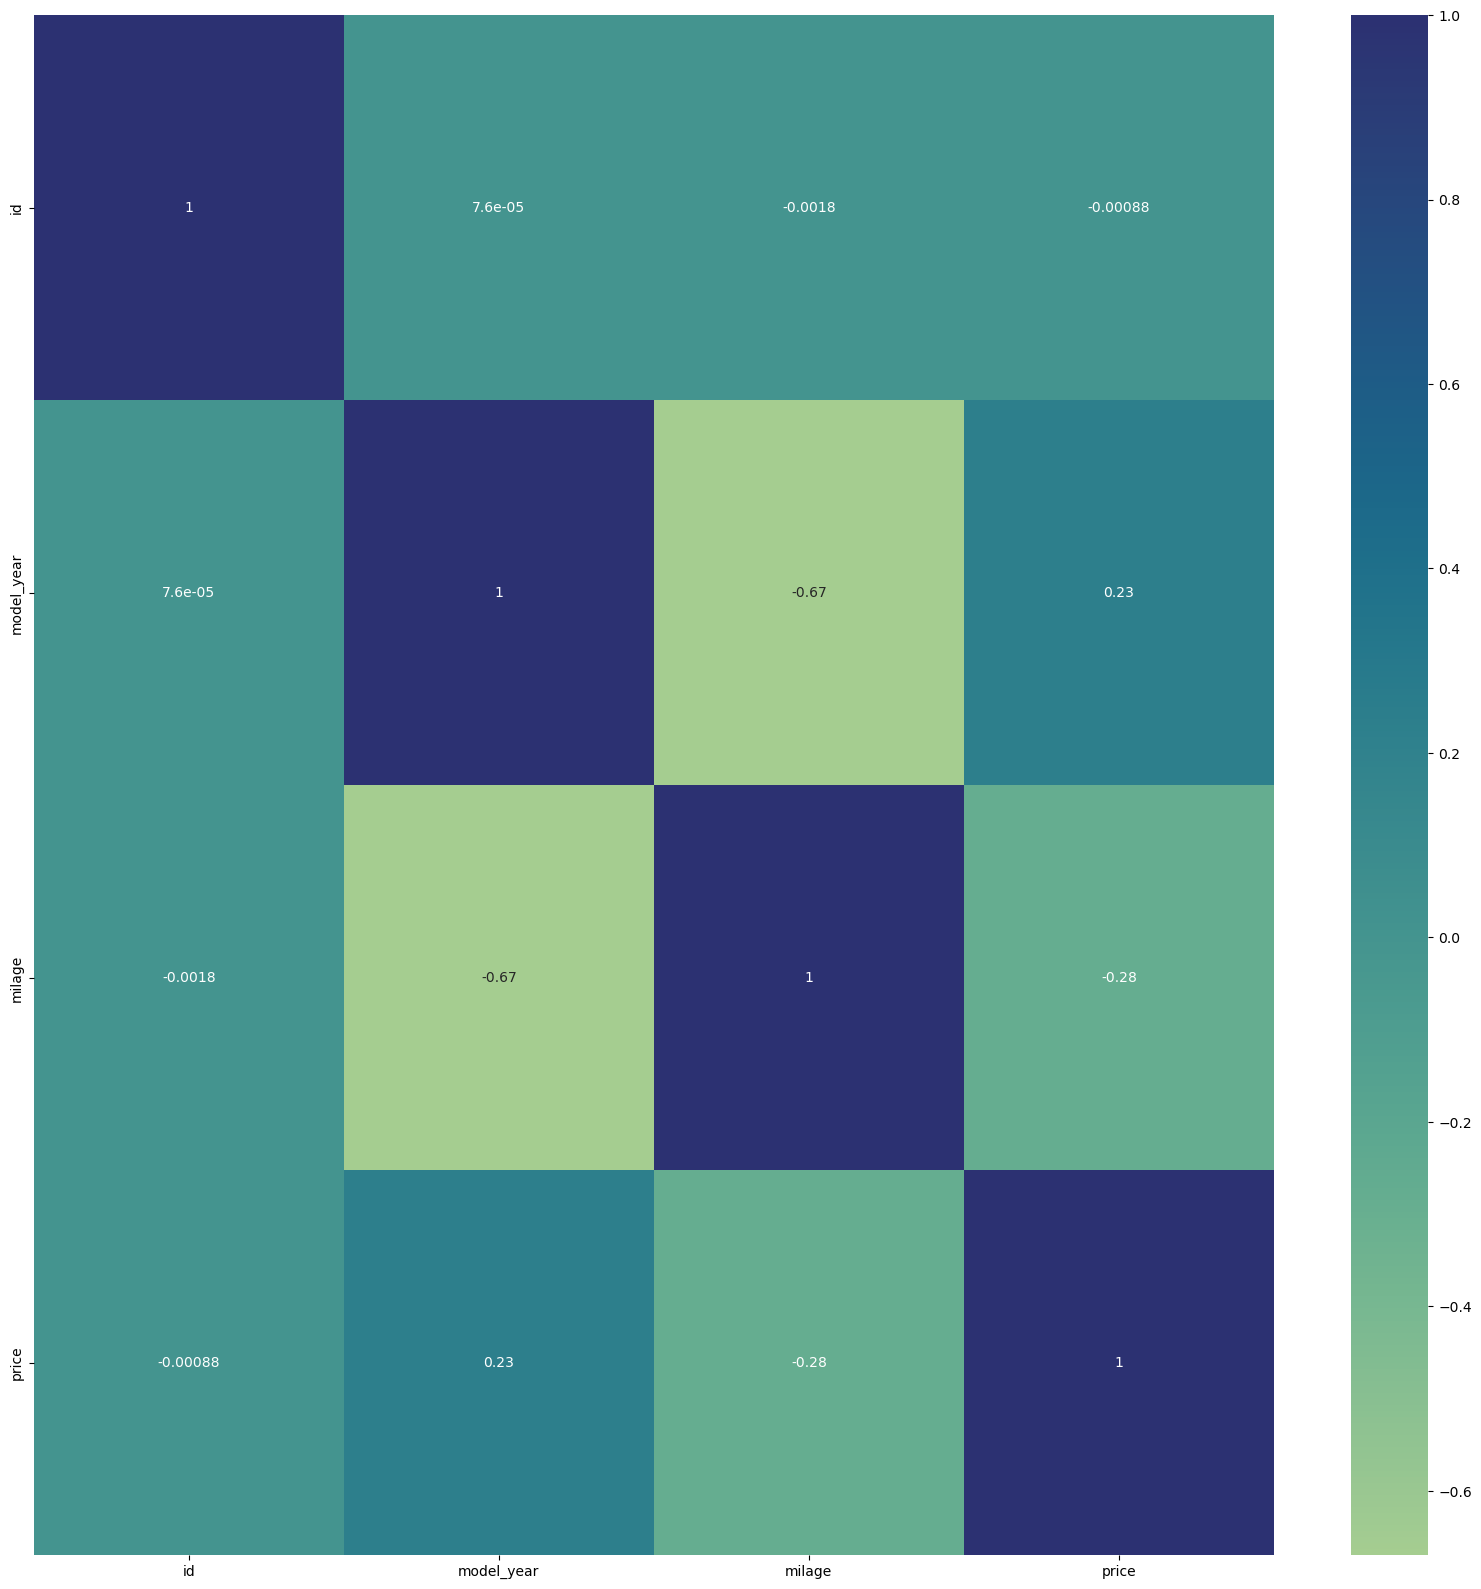

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

<Axes: xlabel='price'>

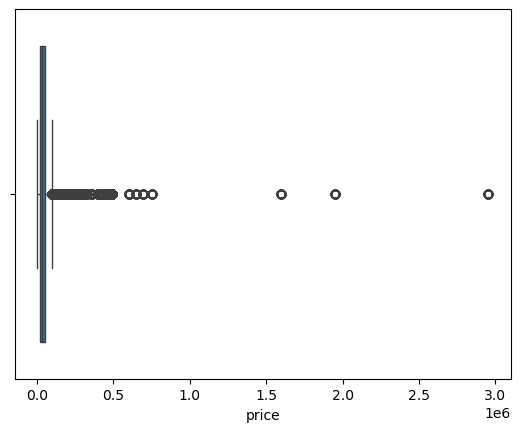

In [27]:
sns.boxplot(x=df["price"])

<Axes: xlabel='milage'>

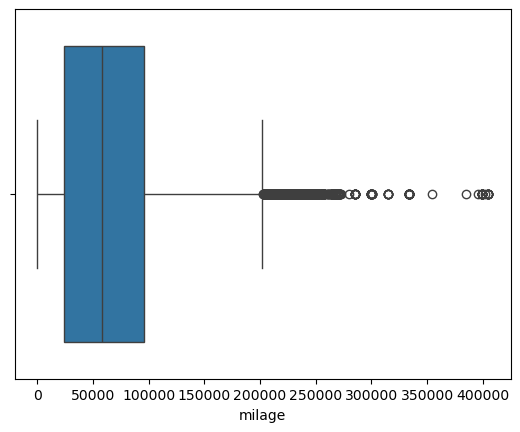

In [28]:
sns.boxplot(x=df["milage"])

In [29]:
# Outlier Kaldırma 

In [30]:
outliers=df.quantile(q=.97, numeric_only=True)

In [31]:
df=df[df["price"]<outliers["price"]]
df=df[df["milage"]<outliers["milage"]]

<Axes: xlabel='price', ylabel='Count'>

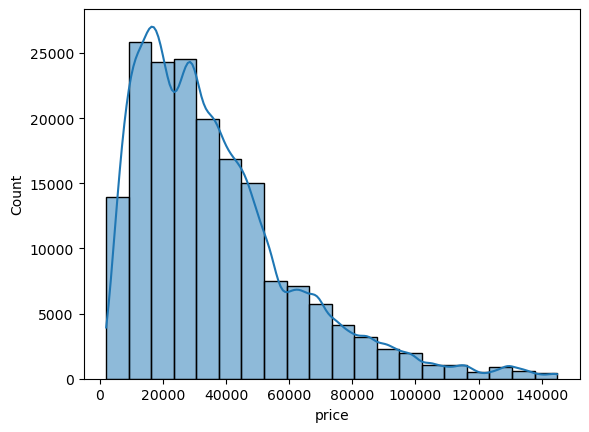

In [32]:
sns.histplot(x=df["price"],kde=True,bins=20)

In [33]:
df=df.drop(["id","engine","transmission"], axis=1)

In [34]:
df.head()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,price
1,Lincoln,LS V8,2002,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,Black,Beige,None reported,Yes,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,White,–,None reported,Yes,29950


In [35]:
df.to_csv("proces_df.csv")

In [36]:
df=pd.get_dummies(df,drop_first=True)

In [37]:
df_columns=df.copy()

In [38]:
del df_columns['price']

In [39]:
columns = df_columns.columns.tolist()

# Sütun adlarını bir CSV dosyasına kaydet
pd.DataFrame(columns, columns=['Feature Names']).to_csv('feature_names.csv', index=False)

In [40]:
df.head()

,model_year,milage,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_FIAT,brand_Ferrari,brand_Ford,brand_GMC,brand_Genesis,brand_Honda,brand_Hummer,brand_Hyundai,brand_INFINITI,brand_Jaguar,brand_Jeep,brand_Karma,brand_Kia,brand_Lamborghini,brand_Land,brand_Lexus,brand_Lincoln,brand_Lotus,brand_Lucid,brand_MINI,brand_Maserati,brand_Maybach,brand_Mazda,brand_McLaren,brand_Mercedes-Benz,brand_Mercury,brand_Mitsubishi,brand_Nissan,brand_Plymouth,brand_Polestar,brand_Pontiac,brand_Porsche,brand_RAM,brand_Rivian,brand_Rolls-Royce,brand_Saab,...,int_col_Orchid,int_col_Oyster W/Contrast,int_col_Oyster/Black,int_col_Parchment,int_col_Parchment.,int_col_Pearl Beige,int_col_Pimento / Ebony,int_col_Pimento Red w/Ebony,int_col_Platinum,int_col_Porpoise,int_col_Portland,int_col_Red,int_col_Red / Black,int_col_Red/Black,int_col_Rhapsody Blue,int_col_Rioja Red,int_col_Roast,int_col_Rock Gray,int_col_Saddle Brown,int_col_Sahara Tan,int_col_Saiga Beige,int_col_Sakhir Orange,int_col_Sakhir Orange/Black,int_col_Sand Beige,int_col_Sandstone,int_col_Sarder Brown,int_col_Satin Black,int_col_Shale,int_col_Shara Beige,int_col_Silk Beige/Black,int_col_Silk Beige/Espresso Brown,int_col_Silver,int_col_Slate,int_col_Sport,int_col_Tan,int_col_Tan/Ebony,int_col_Tan/Ebony/Ebony,int_col_Tension,int_col_Titan Black,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported
1,2002,143250,4999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2002,136731,13900,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2017,19500,45000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2021,7388,97500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

### Modelling

In [52]:
x=df.drop(["price"],axis=1) #ihtiyacımız olmayanları atıp x'e tanımladık ;axis 1 sütun siler asxis 2 satır siler
y=df["price"]

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [60]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,5.647386e-01,1.678610e+04,1.123322e+04
Ridge,5.431270e-01,1.719778e+04,1.184555e+04
Linear,5.422904e-01,1.721352e+04,1.185750e+04
Lasso,5.400427e-01,1.725573e+04,1.192802e+04
Gradient Boosting,5.326626e-01,1.739362e+04,1.179351e+04
mlp_regressor,5.108435e-01,1.779503e+04,1.227026e+04
AdaBoost,4.692725e-01,1.853576e+04,1.239147e+04
ElasticNet,4.459058e-01,1.893941e+04,1.354522e+04
SVR,2.965259e-01,2.134021e+04,1.401307e+04
Extra Tree,2.170119e-01,2.251398e+04,1.462943e+04


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [62]:
xgb=XGBRegressor()

In [63]:
model=xgb.fit(x_train,y_train)

In [64]:
tahmin=xgb.predict(x_test)

In [65]:
r2_score(y_test,tahmin)

0.5647386209854266

In [66]:
mean_squared_error(y_test,tahmin)**.5

16786.098021889753

In [67]:
residuals=y_test-tahmin

<Axes: xlabel='price', ylabel='Count'>

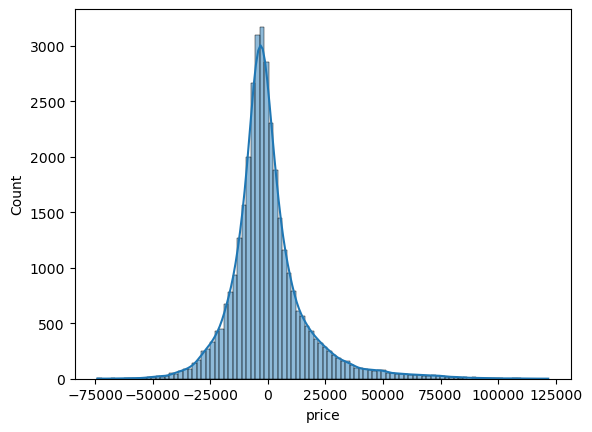

In [68]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='price', ylabel='Density'>

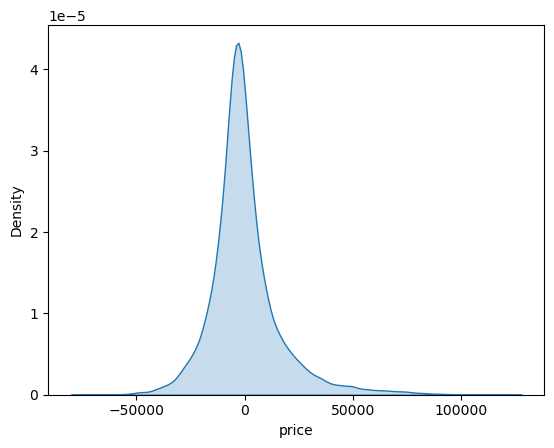

In [69]:
sns.kdeplot(residuals, fill=True)

In [70]:
import pickle

In [71]:
pickle.dump(model,open("cars.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [42]:
x=df.drop(["price"],axis=1) 
y=df["price"]

In [43]:
x=scale(x)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [45]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                                                           

In [46]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1004723712.0000 - val_loss: 384371360.0000
Epoch 2/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 358780288.0000 - val_loss: 331050688.0000
Epoch 3/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 317161472.0000 - val_loss: 311609376.0000
Epoch 4/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 295929504.0000 - val_loss: 300709408.0000
Epoch 5/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 281671712.0000 - val_loss: 295712384.0000
Epoch 6/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 278985504.0000 - val_loss: 292872896.0000
Epoch 7/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 274721216.0000 - val_loss: 290805568.0000
Epoch 8/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 269602272.0000 - val_loss: 291226048.0000
Epoch 9/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 268848160.0000 - val_loss: 289280608.0000
Epoch 10/500
1107/1107 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

In [47]:
tahmin=model.predict(x_test)

1107/1107 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step


In [48]:
r2_score(tahmin,y_test)

0.14365953912989737

In [49]:
mean_squared_error(tahmin,y_test)**.5

25309.49790677717

In [59]:
pickle.dump(model,open("cars2.pkl","wb"))

In [50]:
loss_f=pd.DataFrame(history.history)

<Axes: >

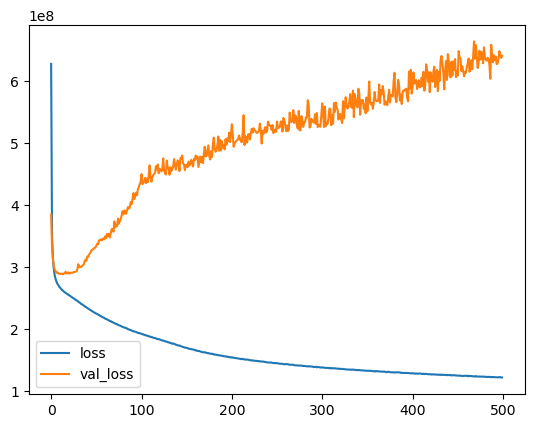

In [51]:
loss_f.plot()

Sonuc olarak Verilerimizi işleyip modelimizi hem klasik yolla hem de derin öğrenme ile eğittik ve modelimizi kayıt ettik.